In [2]:
import pandas as pd
data = pd.read_csv('/Volumes/Transcend/DATA/epa_co_daily_summary.csv')
data.head(1)

,state_code,county_code,site_num,parameter_code,poc,latitude,longitude,datum,parameter_name,sample_duration,...,aqi,method_code,method_name,local_site_name,address,state_name,county_name,city_name,cbsa_name,date_of_last_change
0,6,73,5,42101,1,33.20265,-117.365925,NAD27,Carbon monoxide,1 HOUR,...,NaN,66.0,INSTRUMENTAL - NONDISPERSIVE INFRARED,Oceanside-Mission Ave,1701 MISSION AVE. OCEANSIDE,California,San Diego,Oceanside,San Diego-Carlsbad CA,2016-04-27


In [53]:
data[0]

KeyError: 0

In [3]:
(data.isnull().sum()/len(data)*100).sort_values(ascending=False)

method_code            50.011581
aqi                    49.988419
local_site_name        27.232437
cbsa_name               2.442745
date_of_last_change     0.000000
date_local              0.000000
county_code             0.000000
site_num                0.000000
parameter_code          0.000000
poc                     0.000000
latitude                0.000000
longitude               0.000000
datum                   0.000000
parameter_name          0.000000
sample_duration         0.000000
pollutant_standard      0.000000
observation_count       0.000000
units_of_measure        0.000000
event_type              0.000000
observation_percent     0.000000
arithmetic_mean         0.000000
first_max_value         0.000000
first_max_hour          0.000000
method_name             0.000000
address                 0.000000
state_name              0.000000
county_name             0.000000
city_name               0.000000
state_code              0.000000
dtype: float64

In [4]:
#delete missing attributes using a function 
def del_data_func(data,columns):
    for column_name in columns: del data[column_name]
del_list = data[['method_code','aqi','local_site_name','cbsa_name','parameter_code',
                 'units_of_measure','parameter_name']]
del_data_func (data, del_list) 

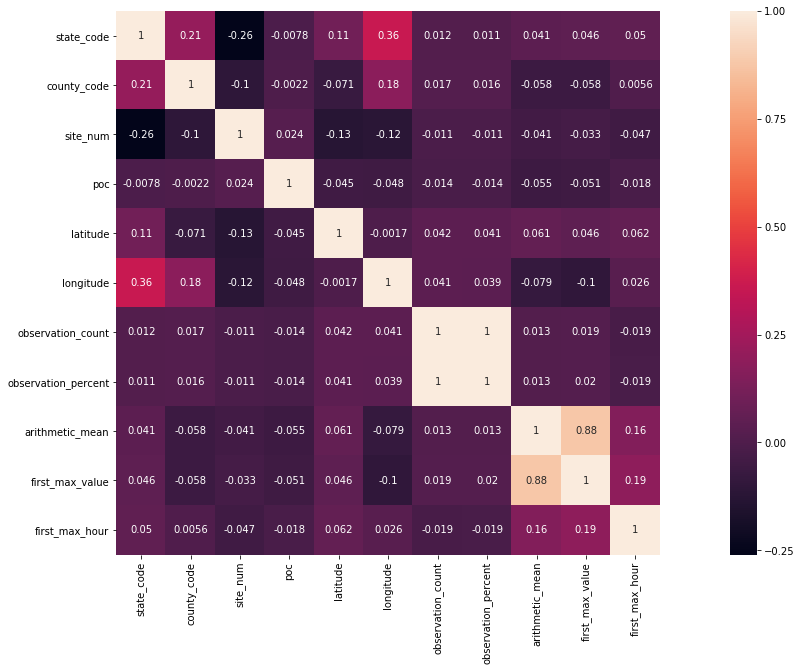

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
#look for correlations
correlation = data.corr(method='pearson')
plt.figure(figsize=(25,10))
sns.heatmap(correlation, vmax=1, square=True,  annot=True ) 
plt.show()

/Users/markon/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/markon/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


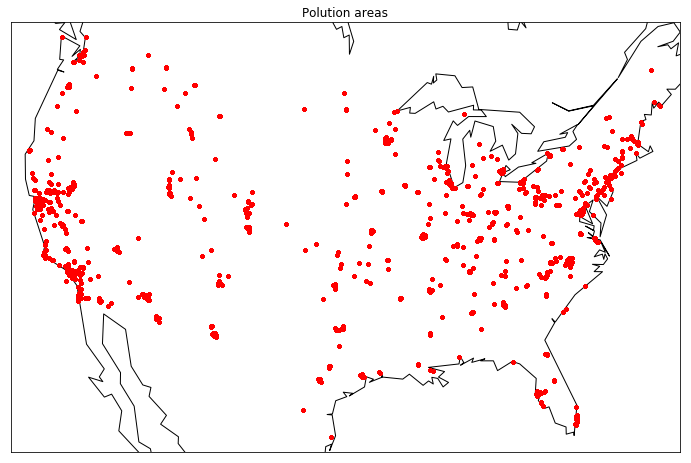

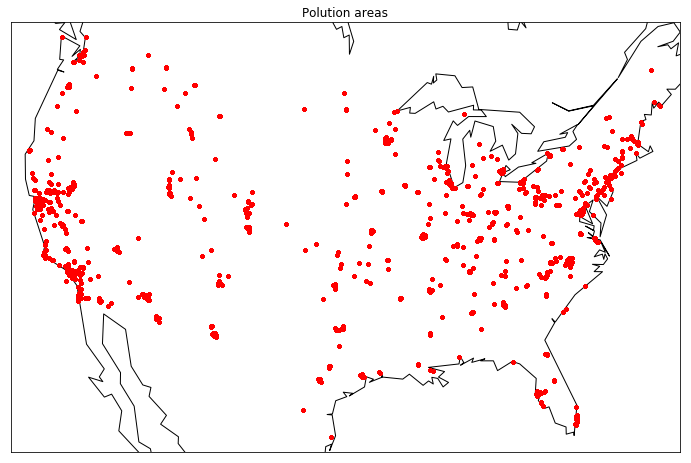

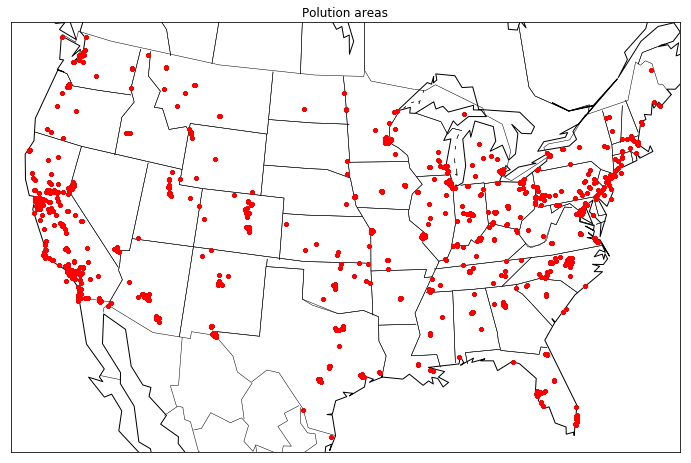

In [8]:
from mpl_toolkits.basemap import Basemap
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
longitudes = data["longitude"].tolist()
latitudes = data["latitude"].tolist()

x,y = m(longitudes,latitudes)

fig = plt.figure(figsize=(12,10))
plt.title("Polution areas")
m.plot(x, y, "o", markersize = 3, color = 'red')

m.drawcoastlines()
#m.fillcontinents(color='white',lake_color='aqua')
#m.drawmapboundary()
m.drawstates()
m.drawcountries()
plt.show()    

In [9]:
m = data.arithmetic_mean.sort_values(ascending=False)

In [10]:
m[:10]

4922524    48.100000
4446964    45.666667
3441719    44.900000
1152040    44.500000
5714775    43.400000
1266796    43.257143
6750362    42.750000
6395665    41.555556
7413944    40.800000
2045452    40.480000
Name: arithmetic_mean, dtype: float64

In [11]:
m[-10:]

1895876   -0.5
5169867   -0.5
2691444   -0.5
6949597   -0.5
7495133   -0.5
4064987   -0.5
3667711   -0.5
1694522   -0.5
8003474   -0.5
7092901   -0.5
Name: arithmetic_mean, dtype: float64

In [13]:
data.describe()

,state_code,county_code,site_num,poc,latitude,longitude,observation_count,observation_percent,arithmetic_mean,first_max_value,first_max_hour
count,8.064820e+06,8.064820e+06,8.064820e+06,8.064820e+06,8.064820e+06,8.064820e+06,8.064820e+06,8.064820e+06,8.064820e+06,8.064820e+06,8.064820e+06
mean,2.632186e+01,7.857813e+01,7.874244e+02,1.046670e+00,3.766868e+01,-9.778910e+01,2.343853e+01,9.769918e+01,6.760713e-01,1.255508e+00,9.519982e+00
std,1.816040e+01,1.064007e+02,1.647026e+03,3.401031e-01,5.652681e+00,1.925043e+01,1.983194e+00,8.235857e+00,6.149224e-01,1.342174e+00,8.040316e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-1.593662e+02,1.000000e+00,4.000000e+00,-5.000000e-01,-5.000000e-01,0.000000e+00
25%,6.000000e+00,1.900000e+01,1.000000e+01,1.000000e+00,3.410374e+01,-1.171497e+02,2.400000e+01,1.000000e+02,2.791670e-01,4.000000e-01,1.000000e+00
50%,2.600000e+01,5.500000e+01,3.100000e+01,1.000000e+00,3.861000e+01,-9.442079e+01,2.400000e+01,1.000000e+02,5.041670e-01,9.000000e-01,7.000000e+00
75%,4.100000e+01,9.700000e+01,1.003000e+03,1.000000e+00,4.081259e+01,-8.062205e+01,2.400000e+01,1.000000e+02,8.833330e-01,1.600000e+00,1.700000e+01
max,8.000000e+01,8.100000e+02,9.997000e+03,9.000000e+00,6.484569e+01,0.000000e+00,2.400000e+01,1.000000e+02,4.810000e+01,6.590000e+01,2.300000e+01


/Users/markon/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/markon/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


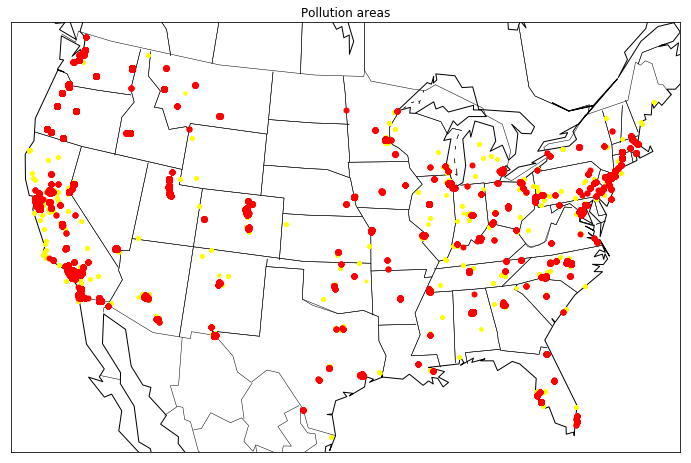

In [20]:
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

data_m = data[data.arithmetic_mean > 6.760713e-01]
long_m = data_m["longitude"].tolist()
lat_m = data_m["latitude"].tolist()
xm,ym = m(long_m,lat_m)

fig = plt.figure(figsize=(12,10))
plt.title("Pollution areas")
m.plot(xm, ym, "o", markersize = 3, color = 'yellow')

data_h = data[data.arithmetic_mean > 6.760713e-01+4*6.149224e-01]
long_h = data_h["longitude"].tolist()
lat_h = data_h["latitude"].tolist()

xh,yh = m(long_h,lat_h)
m.plot(xh, yh, "o", markersize = 5, color = 'red')


m.drawcoastlines()
#m.fillcontinents(color='white',lake_color='aqua')
#m.drawmapboundary()
m.drawstates()
m.drawcountries()
plt.show()    

/Users/markon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/markon/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/markon/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


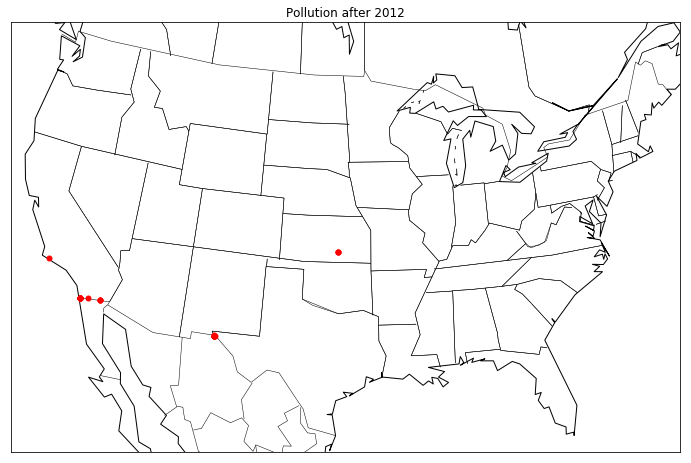

In [23]:
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

data_h = data[data.arithmetic_mean > 6.760713e-01+4*6.149224e-01][data.date_local > "2012-01-01"]
long_h = data_h["longitude"].tolist()
lat_h = data_h["latitude"].tolist()

fig = plt.figure(figsize=(12,10))
plt.title("Pollution after 2012")

xh,yh = m(long_h,lat_h)
m.plot(xh, yh, "o", markersize = 5, color = 'red')


m.drawcoastlines()
#m.fillcontinents(color='white',lake_color='aqua')
#m.drawmapboundary()
m.drawstates()
m.drawcountries()
plt.show()    

In [25]:
dd=data.date_local.sort_values()

In [26]:
dd[0]

'1994-02-01'

In [28]:
len(dd)

8064820

In [29]:
dd[8064819]

'1998-10-29'

In [30]:
dd[1000]

'1990-02-25'

In [31]:
dd[4000000]

'2014-09-14'

In [32]:
data.arithmetic_mean.describe()

count    8.064820e+06
mean     6.760713e-01
std      6.149224e-01
min     -5.000000e-01
25%      2.791670e-01
50%      5.041670e-01
75%      8.833330e-01
max      4.810000e+01
Name: arithmetic_mean, dtype: float64

In [33]:
data['date']=data.date_local.to_datetime()

AttributeError: 'Series' object has no attribute 'to_datetime'

In [35]:
data['date'] = data['date_local'].apply(lambda x: pd.to_datetime(x))

In [36]:
data.date[0]

Timestamp('1994-02-01 00:00:00')

In [38]:
data.date[len(data)-1]

Timestamp('1998-10-29 00:00:00')

In [39]:
data_s = data.sort_index(by='date')

/Users/markon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


In [41]:
data_s.date[0]

Timestamp('1994-02-01 00:00:00')

In [42]:
data_s.date[len(data_s)-1]

Timestamp('1998-10-29 00:00:00')

In [43]:
data.date.describe()

count                 8064820
unique                   9983
top       1996-03-27 00:00:00
freq                     1058
first     1990-01-01 00:00:00
last      2017-05-01 00:00:00
Name: date, dtype: object

In [44]:
data_v = data.sort_values(by='date')

In [51]:
data_v.date[2]

Timestamp('2010-05-06 00:00:00')

In [63]:
series = pd.read_csv('/Volumes/Transcend/DATA/epa_co_daily_summary.csv',index_col=11,parse_dates=True)
series.head(1)

,state_code,county_code,site_num,parameter_code,poc,latitude,longitude,datum,parameter_name,sample_duration,...,aqi,method_code,method_name,local_site_name,address,state_name,county_name,city_name,cbsa_name,date_of_last_change
date_local,,,,,,,,,,,,,,,,,,,,,
1994-02-01,6,73,5,42101,1,33.20265,-117.365925,NAD27,Carbon monoxide,1 HOUR,...,NaN,66.0,INSTRUMENTAL - NONDISPERSIVE INFRARED,Oceanside-Mission Ave,1701 MISSION AVE. OCEANSIDE,California,San Diego,Oceanside,San Diego-Carlsbad CA,2016-04-27


In [67]:
ss=series.sort_index()

In [56]:
series.date_local[len(series)-1]

'1998-10-29'

In [70]:
ss.index[-1]

Timestamp('2017-05-01 00:00:00')

In [59]:
dir(series)

['T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_SLICEMAP',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rmod__',
 '__rmul__',
 '__ror__',
 '__round__',
 '__rpow__',
 '__

In [73]:
series.head()

,state_code,county_code,site_num,parameter_code,poc,latitude,longitude,datum,parameter_name,sample_duration,...,aqi,method_code,method_name,local_site_name,address,state_name,county_name,city_name,cbsa_name,date_of_last_change
date_local,,,,,,,,,,,,,,,,,,,,,
1994-02-01,6,73,5,42101,1,33.202650,-117.365925,NAD27,Carbon monoxide,1 HOUR,...,NaN,66.0,INSTRUMENTAL - NONDISPERSIVE INFRARED,Oceanside-Mission Ave,1701 MISSION AVE. OCEANSIDE,California,San Diego,Oceanside,San Diego-Carlsbad CA,2016-04-27
1996-04-29,39,113,28,42101,1,39.787222,-84.226111,NAD83,Carbon monoxide,1 HOUR,...,NaN,67.0,INSTRUMENTAL - NONDISPERSIVE INFRARED,FROC,901 WEST FAIRVIEW AVE.,Ohio,Montgomery,Dayton,Dayton OH,2016-04-26
2010-05-06,30,31,16,42101,1,44.661393,-111.105891,WGS84,Carbon monoxide,1 HOUR,...,NaN,93.0,INSTRUMENTAL - GAS FILTER CORRELATION CO ANALYZER,West Yellowstone City Center,ALLEY,Montana,Gallatin,West Yellowstone,Bozeman MT,2016-04-10
2005-05-05,51,13,20,42101,1,38.857700,-77.059220,WGS84,Carbon monoxide,1 HOUR,...,NaN,67.0,INSTRUMENTAL - NONDISPERSIVE INFRARED,Aurora Hills Visitors Center,S 18TH AND HAYES ST,Virginia,Arlington,Arlington,Washington-Arlington-Alexandria DC-VA-MD-WV,2016-04-21
2005-06-19,6,65,8001,42101,1,33.999580,-117.416010,WGS84,Carbon monoxide,1 HOUR,...,NaN,67.0,INSTRUMENTAL - NONDISPERSIVE INFRARED,Rubidoux,5888 MISSION BLVD. RUBIDOUX,California,Riverside,Rubidoux,Riverside-San Bernardino-Ontario CA,2016-04-21


In [62]:
series.index

Index(['CO 1-hour 1971', 'CO 1-hour 1971', 'CO 1-hour 1971', 'CO 1-hour 1971',
       'CO 1-hour 1971', 'CO 1-hour 1971', 'CO 8-hour 1971', 'CO 8-hour 1971',
       'CO 8-hour 1971', 'CO 8-hour 1971',
       ...
       'CO 8-hour 1971', 'CO 8-hour 1971', 'CO 8-hour 1971', 'CO 8-hour 1971',
       'CO 8-hour 1971', 'CO 8-hour 1971', 'CO 8-hour 1971', 'CO 1-hour 1971',
       'CO 1-hour 1971', 'CO 8-hour 1971'],
      dtype='object', name='pollutant_standard', length=8064820)

In [72]:
ss.arithmetic_mean[:100]

date_local
1990-01-01    0.300000
1990-01-01    0.921053
1990-01-01    2.708333
1990-01-01    1.708333
1990-01-01    0.441667
1990-01-01    2.968421
1990-01-01    2.542105
1990-01-01    0.488889
1990-01-01    0.936842
1990-01-01    1.829167
1990-01-01    2.452632
1990-01-01    0.478947
1990-01-01    0.626316
1990-01-01    1.000000
1990-01-01    1.956522
1990-01-01    0.425000
1990-01-01    0.715789
1990-01-01    0.379167
1990-01-01    0.454167
1990-01-01    0.300000
1990-01-01    0.347368
1990-01-01    0.887500
1990-01-01    1.142105
1990-01-01    0.478261
1990-01-01    0.557895
1990-01-01    1.794737
1990-01-01    2.400000
1990-01-01    1.800000
1990-01-01    2.125000
1990-01-01    0.495833
                ...   
1990-01-01    2.078947
1990-01-01    0.610526
1990-01-01    0.600000
1990-01-01    3.405556
1990-01-01    3.200000
1990-01-01    2.913043
1990-01-01    0.033333
1990-01-01    0.670833
1990-01-01    2.342105
1990-01-01    0.394444
1990-01-01    3.695833
1990-01-01    0.994444


In [74]:
ss.head()

,state_code,county_code,site_num,parameter_code,poc,latitude,longitude,datum,parameter_name,sample_duration,...,aqi,method_code,method_name,local_site_name,address,state_name,county_name,city_name,cbsa_name,date_of_last_change
date_local,,,,,,,,,,,,,,,,,,,,,
1990-01-01,18,97,70,42101,1,39.793333,-86.063889,NAD27,Carbon monoxide,8-HR RUN AVG END HOUR,...,3.0,NaN,-,NaN,1885 N ARLINGTON NAVAL AVIONICS,Indiana,Marion,Indianapolis,Indianapolis-Carmel-Anderson IN,2016-04-28
1990-01-01,17,201,11,42101,1,42.267674,-89.087851,WGS84,Carbon monoxide,8-HR RUN AVG END HOUR,...,13.0,NaN,-,CITY HALL,425 E. STATE,Illinois,Winnebago,Rockford,Rockford IL,2016-04-28
1990-01-01,6,17,5,42101,1,38.941111,-119.941667,NAD27,Carbon monoxide,1 HOUR,...,NaN,11.0,INSTRUMENTAL - NONDISPERSIVE INFRARED,NaN,STATELINE-4045 HWY 50 SOUTH LAKE TAHOE,California,El Dorado,South Lake Tahoe,Sacramento--Roseville--Arden-Arcade CA,2016-04-28
1990-01-01,8,69,1004,42101,1,40.577470,-105.078920,WGS84,Carbon monoxide,1 HOUR,...,NaN,12.0,INSTRUMENTAL - NONDISPERSIVE INFRARED,Fort Collins - CSU - S. Mason,708 S. Mason St.,Colorado,Larimer,Fort Collins,Fort Collins CO,2016-04-28
1990-01-01,36,67,17,42101,1,43.042570,-76.143300,WGS84,Carbon monoxide,1 HOUR,...,NaN,11.0,INSTRUMENTAL - NONDISPERSIVE INFRARED,SYRACUSE COMS,E.ADAMS STREET AND ROUTE 81,New York,Onondaga,Syracuse,Syracuse NY,2016-04-30


In [75]:
ss.tail()

,state_code,county_code,site_num,parameter_code,poc,latitude,longitude,datum,parameter_name,sample_duration,...,aqi,method_code,method_name,local_site_name,address,state_name,county_name,city_name,cbsa_name,date_of_last_change
date_local,,,,,,,,,,,,,,,,,,,,,
2017-05-01,18,97,72,42101,1,39.768056,-86.160010,NAD83,Carbon monoxide,8-HR RUN AVG END HOUR,...,9.0,NaN,-,Indpls.- Illinois St.,50 NORTH ILLINOIS STREET,Indiana,Marion,Indianapolis,Indianapolis-Carmel-Anderson IN,2017-05-04
2017-05-01,19,153,30,42101,1,41.603159,-93.643118,WGS84,Carbon monoxide,8-HR RUN AVG END HOUR,...,2.0,NaN,-,CARPENTER,1907 CARPENTER DES MOINES IOWA,Iowa,Polk,Des Moines,Des Moines-West Des Moines IA,2017-05-04
2017-05-01,37,119,41,42101,4,35.240100,-80.785683,WGS84,Carbon monoxide,8-HR RUN AVG END HOUR,...,2.0,NaN,-,Garinger High School,1130 EASTWAY DRIVE,North Carolina,Mecklenburg,Charlotte,Charlotte-Concord-Gastonia NC-SC,2017-05-15
2017-05-01,23,9,103,42101,1,44.377050,-68.260900,WGS84,Carbon monoxide,8-HR RUN AVG END HOUR,...,1.0,NaN,-,MCFARLAND HILL Air Pollutant Research Site,567 Eagle Lake Road,Maine,Hancock,Not in a city,NaN,2017-05-03
2017-05-01,19,163,15,42101,1,41.530011,-90.587611,WGS84,Carbon monoxide,8-HR RUN AVG END HOUR,...,2.0,NaN,-,DAVENPORT JEFFERSON SCH.,10TH ST. & VINE ST. DAVENPORT,Iowa,Scott,Davenport,Davenport-Moline-Rock Island IA-IL,2017-05-18


In [76]:
len(ss)

8064820

In [82]:
len(ss.index[:pd.datetime(2000,1,1)])

TypeError: slice indices must be integers or None or have an __index__ method

In [83]:
pd.Timestamp('2000-01-01')

Timestamp('2000-01-01 00:00:00')

In [87]:
len(ss['1990'])

332312

In [88]:
ss['1990'].arithmetic_mean.describe()

count    332312.000000
mean          1.125772
std           0.863869
min           0.000000
25%           0.552174
50%           0.941667
75%           1.462500
max          12.120833
Name: arithmetic_mean, dtype: float64

In [95]:
len(ss['1990':'2016'].arithmetic_mean)

8036390

In [93]:
ss[pd.date_range('1990', '2017')].arithmetic_mean.apply(lambda x: mean(x))

KeyError: "DatetimeIndex(['1990-01-01', '1990-01-02', '1990-01-03', '1990-01-04',\n               '1990-01-05', '1990-01-06', '1990-01-07', '1990-01-08',\n               '1990-01-09', '1990-01-10',\n               ...\n               '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',\n               '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30',\n               '2016-12-31', '2017-01-01'],\n              dtype='datetime64[ns]', length=9863, freq='D') not in index"

In [91]:
pd.date_range('1990', '2017')

DatetimeIndex(['1990-01-01', '1990-01-02', '1990-01-03', '1990-01-04',
               '1990-01-05', '1990-01-06', '1990-01-07', '1990-01-08',
               '1990-01-09', '1990-01-10',
               ...
               '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
               '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30',
               '2016-12-31', '2017-01-01'],
              dtype='datetime64[ns]', length=9863, freq='D')

/Users/markon/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/markon/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


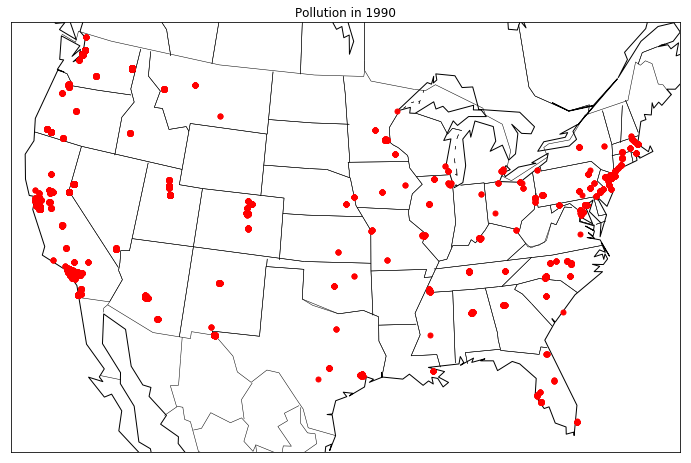

In [97]:
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

ss1990 = ss['1990']
data_h = ss1990[ss1990.arithmetic_mean > 6.760713e-01+4*6.149224e-01]
long_h = data_h["longitude"].tolist()
lat_h = data_h["latitude"].tolist()

fig = plt.figure(figsize=(12,10))
plt.title("Pollution in 1990")

xh,yh = m(long_h,lat_h)
m.plot(xh, yh, "o", markersize = 5, color = 'red')


m.drawcoastlines()
#m.fillcontinents(color='white',lake_color='aqua')
#m.drawmapboundary()
m.drawstates()
m.drawcountries()
plt.show()    

In [116]:
def yearmap(year):
    fig = Figure()
    canvas = FigureCanvas(fig)
    ax = fig.add_axes([0.1,0.1,0.8,0.8])

    m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95,ax=ax)

    ss2016 = ss[str(year)]
    data_h = ss2016[ss2016.arithmetic_mean > 6.760713e-01+4*6.149224e-01]
    long_h = data_h["longitude"].tolist()
    lat_h = data_h["latitude"].tolist()

    fig = plt.figure(figsize=(12,10))
    plt.title("Pollution in %d" % year)

    xh,yh = m(long_h,lat_h)
    m.plot(xh, yh, "o", markersize = 5, color = 'red')


    m.drawcoastlines()
    #m.fillcontinents(color='white',lake_color='aqua')
    #m.drawmapboundary()
    m.drawstates()
    m.drawcountries()
    canvas.print_figure(('year%04d' % year),dpi=100)



/Users/markon/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/markon/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


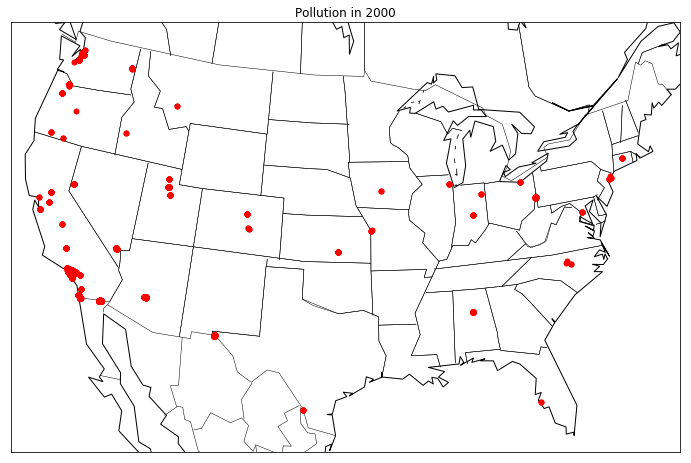

In [101]:
yearmap(2000)

/Users/markon/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/markon/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


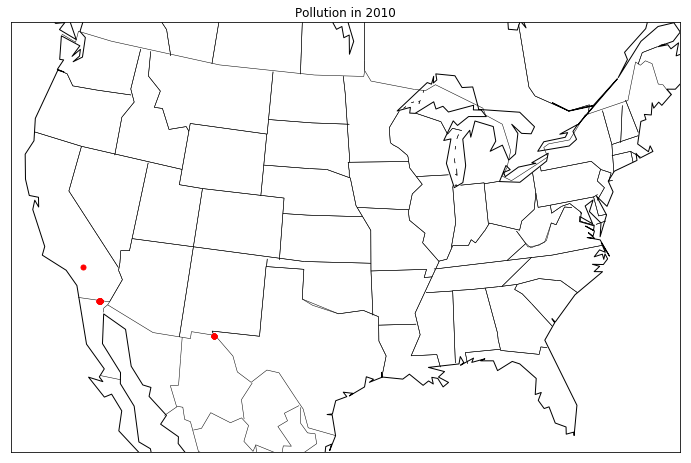

In [102]:
yearmap(2010)

/Users/markon/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/markon/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


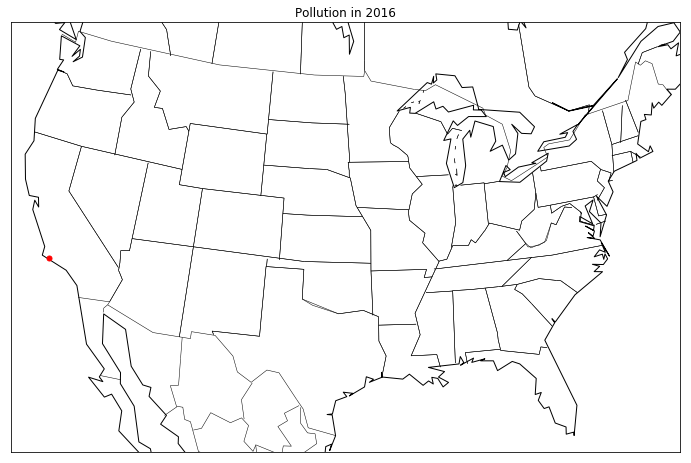

In [98]:
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

ss2016 = ss['2016']
data_h = ss2016[ss2016.arithmetic_mean > 6.760713e-01+4*6.149224e-01]
long_h = data_h["longitude"].tolist()
lat_h = data_h["latitude"].tolist()

fig = plt.figure(figsize=(12,10))
plt.title("Pollution in 2016")

xh,yh = m(long_h,lat_h)
m.plot(xh, yh, "o", markersize = 5, color = 'red')


m.drawcoastlines()
#m.fillcontinents(color='white',lake_color='aqua')
#m.drawmapboundary()
m.drawstates()
m.drawcountries()
plt.show()    

In [99]:
str(1999)

'1999'

In [103]:
plt

<module 'matplotlib.pyplot' from '/Users/markon/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [104]:
plt.savefig('year.png')

In [105]:
m.savefig('year.png')

AttributeError: 'Basemap' object has no attribute 'savefig'

/Users/markon/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/markon/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


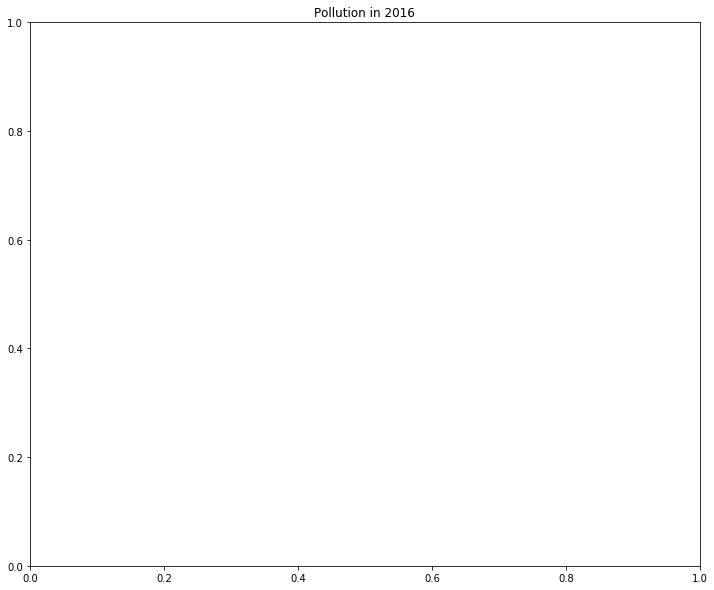

In [115]:
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

fig = Figure()
canvas = FigureCanvas(fig)
ax = fig.add_axes([0.1,0.1,0.8,0.8])

m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95,ax=ax)


ss2016 = ss['2016']
data_h = ss2016[ss2016.arithmetic_mean > 6.760713e-01+4*6.149224e-01]
long_h = data_h["longitude"].tolist()
lat_h = data_h["latitude"].tolist()

fig = plt.figure(figsize=(12,10))
plt.title("Pollution in 2016")

xh,yh = m(long_h,lat_h)
m.plot(xh, yh, "o", markersize = 5, color = 'red')


m.drawcoastlines()
#m.fillcontinents(color='white',lake_color='aqua')
#m.drawmapboundary()
m.drawstates()
m.drawcountries()
plt.show()    
canvas.print_figure('simpletest',dpi=100)


In [120]:
for y in range(1990,2018):
    yearmap(y)
    print(y)

/Users/markon/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/markon/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009


/Users/markon/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


2010
2011
2012
2013
2014
2015
2016
2017
